In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Thu, 13 Jun 2024 15:16


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,761,351","22,633,709","-3,127,642",-12.14%
Collector,"4,378,889","3,379,107","-999,782",-22.83%
Freeway,"28,073,146","29,225,458","1,152,312",4.10%
Ramp,"756,602","618,834","-137,768",-18.21%
Total,"58,969,988","55,857,108","-3,112,880",-5.28%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,168,323","30,723,890","-444,433",-1.43%
Kitsap,"4,567,541","3,681,479","-886,062",-19.40%
Pierce,"13,634,217","12,854,092","-780,125",-5.72%
Snohomish,"9,599,907","8,597,647","-1,002,260",-10.44%
Total,"58,969,988","55,857,108","-3,112,880",-5.28%


----
### Daily | Scatterplots 

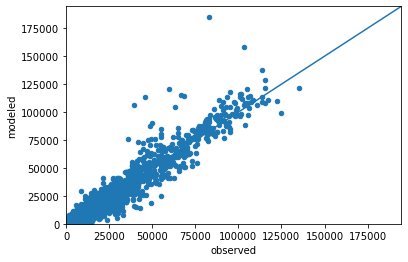

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.959849841941866


---
By County

King r^2: 0.9701943355308248
Kitsap r^2: 0.950549038146256
Pierce r^2: 0.9415353782356389
Snohomish r^2: 0.9564462815240714


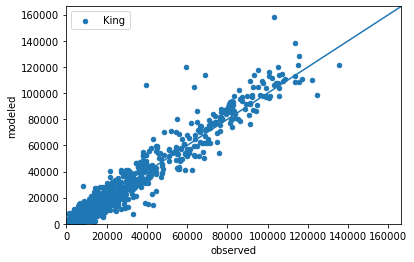

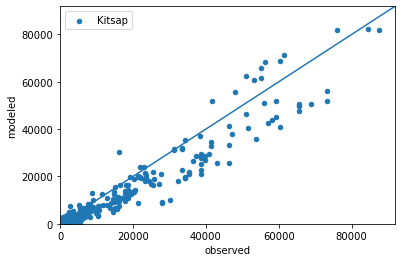

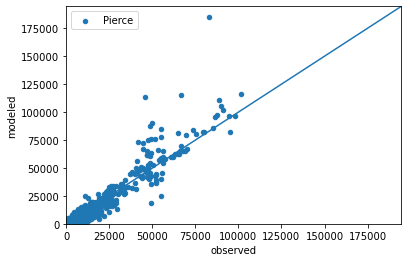

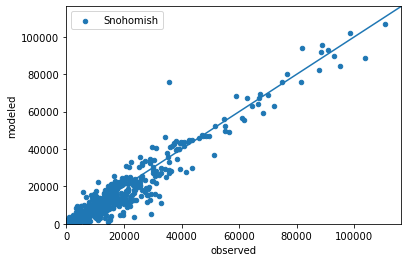

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9044971809308516
r^2 Arterial: 0.8753436965372147


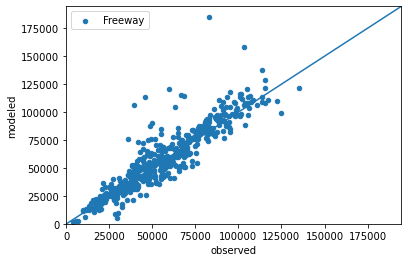

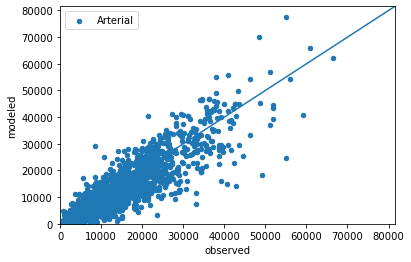

In [10]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9003030444587246


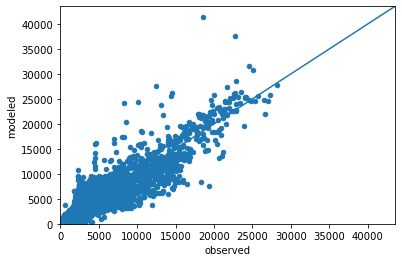

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"582,116","538,663",King,"-43,453",-7.46%
1,KENT,"552,442","505,041",King,"-47,401",-8.58%
2,SEATTLE - SOUTH OF CBD,"473,322","515,290",King,"41,968",8.87%
3,SHIP CANAL,"434,069","566,137",King,"132,068",30.43%
4,SOUTH BELLEVUE,"389,700","361,374",King,"-28,326",-7.27%
5,MILL CREEK,"387,047","382,655",King,"-4,392",-1.13%
6,KIRKLAND-REDMOND,"381,663","421,285",King,"39,622",10.38%
7,SEATTLE - NORTH,"341,251","384,579",King,"43,328",12.70%
8,TACOMA - EAST OF CBD,"300,463","348,163",Pierce,"47,700",15.88%
9,PARKLAND,"297,722","278,277",Pierce,"-19,445",-6.53%


r^2 : 0.9746799704990533


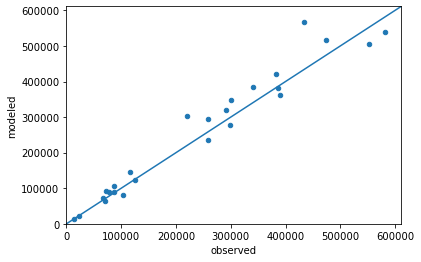

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_boardings','model_boardings','diff']] = df[['observed_boardings','model_boardings','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_boardings', ascending=False)

,agency,observed_boardings,model_boardings,diff,perc_diff
3,Sound Transit,"113,374","158,221","44,847",39.56%
4,Washington Ferries,"9,278","5,658","-3,620",-39.02%
1,King County Metro,"7,852","420,406","412,555","5,254.39%"
2,Kitsap Transit,"7,609","27,283","19,674",258.56%
0,Everett Transit,"4,201","3,184","-1,017",-24.21%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,W,759,"1,004",245,32.24%
1,S,338,959,621,183.62%
2,Kingston - EdmondsE,"1,500",139,"-1,361",-90.72%
3,Bainbridge Island -,"5,514","3,283","-2,230",-40.45%
4,WSF Bremerton - Seat,"1,189",163,"-1,026",-86.30%
5,Southworth - Fauntle,143,253,111,77.71%
6,Vashon Island - Faun,560,"1,552",991,177.03%
7,Southworth - Vashon,108,107,-1,-0.61%
8,Point Defiance - Tah,265,161,-104,-39.38%


r^2 : 0.8228623480696784


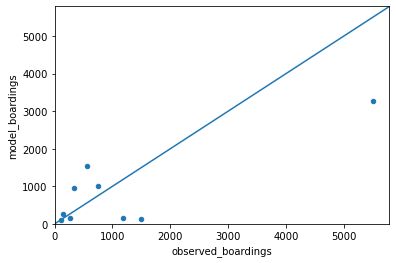

In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4203,Annapolis Foot Ferry,794
2,4200,Bremerton-Seattle Fa,476
3,4201,Bremerton-Port Orcha,440
0,1973,E,352
1,1975,N,175
10,5005,Vashon Island - Faun,75
11,5007,Point Defiance - Tah,73
7,5002,Bainbridge Island -,55
9,5004,Fauntleroy - Southwo,37
8,5003,WSF Seattle - Bremer,11


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,Link Red Line,"79,522","77,356","-2,166",-2.72%
1,Sounder South,"6,038","12,074","6,036",99.96%
2,Sounder North,316,13,-303,-95.76%


r^2 : 0.9967525348316687


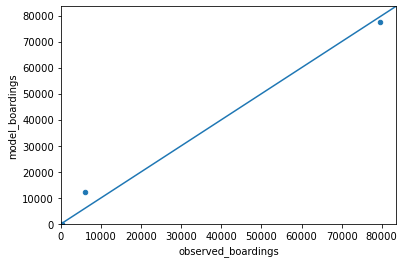

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('model_boardings', ascending=False)

,description,observed_boardings,model_boardings,diff,perc_diff
2,Sound Transit 550,"3,351","9,994","6,643",198.24%
1,First Hill Streetcar,"3,900","1,363","-2,537",-65.05%
0,SLU Streetcar,"1,050","1,081",31,2.92%


r^2 : 0.3604727926130998


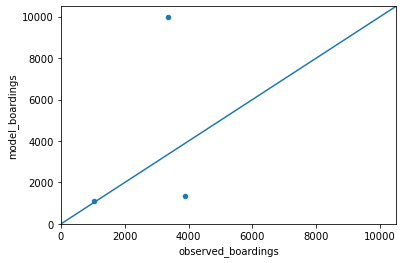

In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Everett Transit: 0.9499463362345166
r^2 King County Metro: 0.0936044294392241


r^2 Kitsap Transit: 0.5974905495201908
r^2 Sound Transit: 0.9877480106115335
r^2 Washington Ferries: 0.8582897271998384


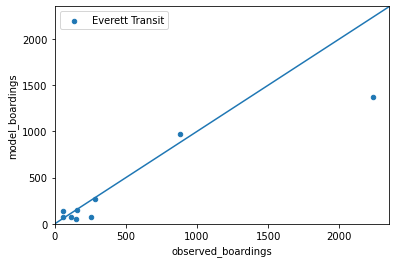

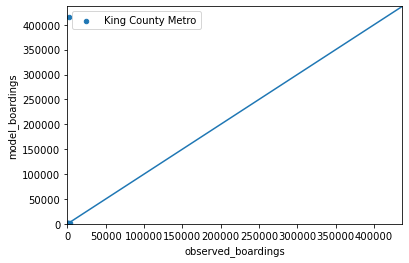

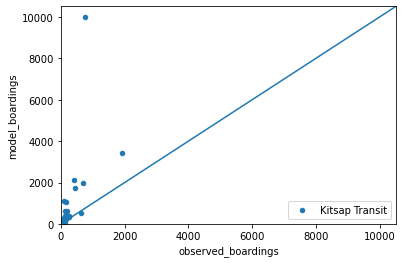

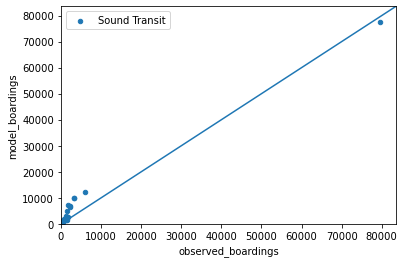

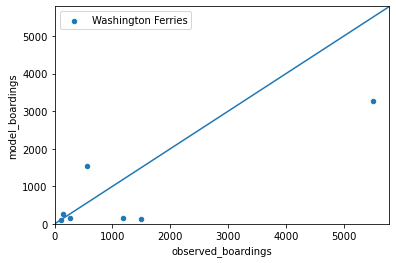

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings', label=agency)
        lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['model_boardings']-df['observed_boardings']
df['percent_diff'] = df['diff']/df['observed_boardings']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_boardings,model_boardings,diff,percent_diff
station_name,,,,
Husky Stadium,"6,134","4,235","-1,899",-30.96%
Westlake,"8,845","9,299",454,5.14%
University St,"4,324","5,972","1,648",38.10%
Pioneer Square,"2,400","5,005","2,605",108.54%
Int'l District,"4,399","1,650","-2,749",-62.50%
Capitol Hill,"7,667","6,611","-1,056",-13.78%
Stadium,"1,731",553,"-1,178",-68.08%
SODO,"1,669","3,153","1,484",88.94%
Beacon Hill,"2,147",990,"-1,157",-53.90%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_boardings','model_boardings']]
df_combined['diff'] = df_combined['model_boardings']-df_combined['observed_boardings']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_boardings']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_boardings,model_boardings,diff,percent_diff
station_group,,,,
Husky Stadium,"6,134","4,235","-1,899",-30.96%
Capitol Hill,"7,667","6,611","-1,056",-13.78%
Westlake/University St,"13,169","15,271","2,102",15.96%
Pioneer Square/Int'l District,"6,799","6,655",-144,-2.12%
Stadium/SODO,"3,400","3,706",306,9.00%
Beacon Hill/Mount Baker,"4,008","2,074","-1,934",-48.25%
Columbia City,"1,630","1,061",-569,-34.93%
Othello/Rainier Beach,"3,525","2,496","-1,029",-29.19%
Tukwila Int'l Blvd,"2,298","1,794",-504,-21.91%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.91,-99.00,99.91,-100.92%
Westlake,0.18,0.36,-0.19,-51.82%
University St,0.27,0.20,0.07,33.02%
Pioneer Square,0.44,0.16,0.28,174.44%
Int'l District,0.68,0.45,0.23,51.19%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.27,0.12,0.15,128.30%
SODO,0.57,0.31,0.26,83.42%
Beacon Hill,0.37,0.35,0.01,3.92%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"132,000","124,677","-7,323",-5.55%
I-5 to Mount Vernon,3744,Snohomish,"64,400","57,992","-6,408",-9.95%
I-90 @ Snoqualmie Pass,3739,King,"33,800","29,759","-4,041",-11.95%
SR-507 to Yelm,3734,Pierce,"21,800","19,819","-1,981",-9.09%
SR-532 to Camano Island,3746,Snohomish,"20,700","20,213",-487,-2.35%
SR-3 to Belfair,3749,Kitsap,"18,400","16,410","-1,990",-10.82%
Hood Canal Bridge,3748,Kitsap,"17,600","16,573","-1,027",-5.83%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","8,402",-698,-7.67%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,050","6,023",-27,-0.45%


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

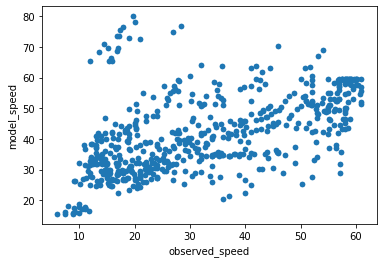

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

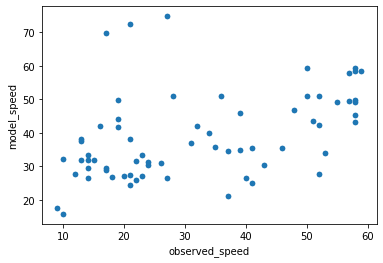

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,45,58
15,Everett to Seattle - SB,27,27
24,Tacoma to Seattle - NB,30,24
33,Seattle to Tacoma - SB,43,58
42,Bellevue to Lynnwood - NB,49,57
51,Lynnwood to Bellevue - SB,26,22
60,Tukwila to Bellevue - NB,27,20
69,Bellevue to Tukwila - SB,30,43
78,Auburn to Renton - NB,32,22
87,Renton to Auburn - SB,49,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

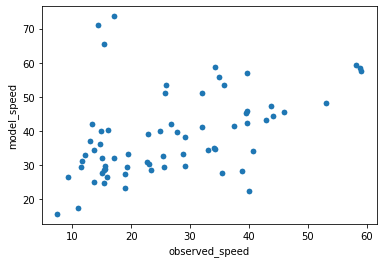

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,29,23
10,Everett to Seattle - SB,40,28
19,Tacoma to Seattle - NB,43,43
28,Seattle to Tacoma - SB,33,25
37,Bellevue to Lynnwood - NB,29,26
46,Lynnwood to Bellevue - SB,42,40
55,Tukwila to Bellevue - NB,30,29
64,Bellevue to Tukwila - SB,27,19
73,Auburn to Renton - NB,47,44
82,Renton to Auburn - SB,35,34
